In [ ]:
#pip install EXOSpy==2.3

Processing...:  14%|███▎                    | 7/50 [00:00<00:00, 62.90it/s]

g factor used in this analysis =  0.0025557668983080544


Processing...: 100%|███████████████████████| 50/50 [00:00<00:00, 54.59it/s]


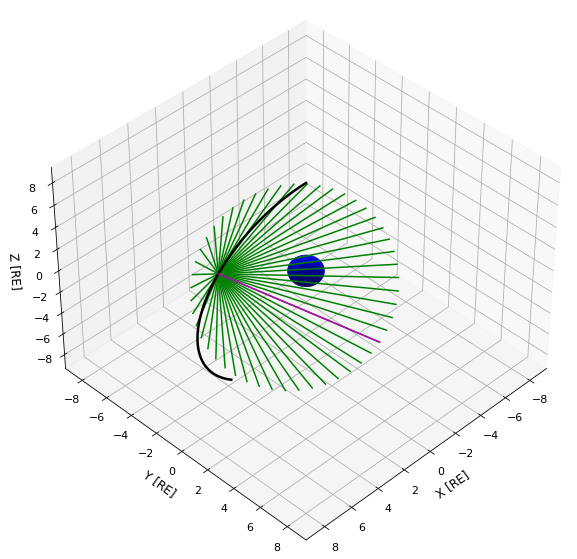

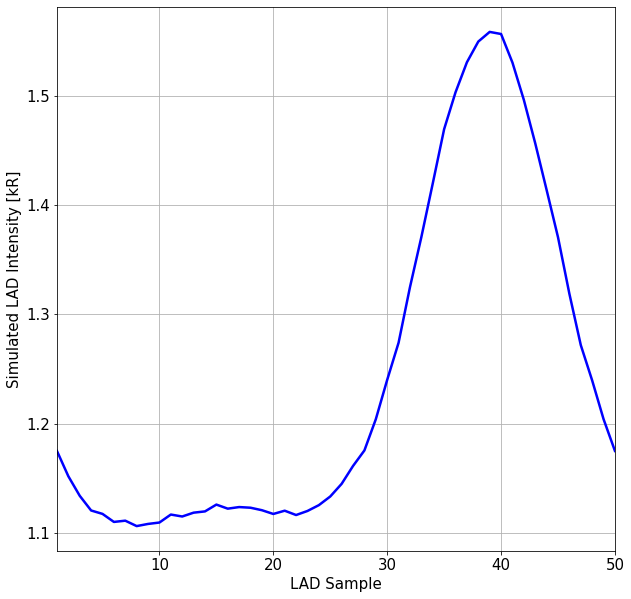

In [11]:
#------ EXAMPLE SIMULATION TWINS SATELLITE OBSERVATIONS ------------------------
import exospy.exospy as ep
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

# Simulating TWINS orbit (circular)
theta = np.linspace(-np.pi/4,np.pi/2,100)
r_orb = 8
x_orb = r_orb*np.cos(theta)
z_orb = r_orb*np.sin(theta)
y_orb = np.zeros(len(x_orb))

# Simulating TWINS LOS
angle_LAD = 40 # degrees
theta     = np.linspace(0,2*np.pi,50)
y = np.sin(angle_LAD*np.pi/180)*np.cos(theta)
z = np.sin(angle_LAD*np.pi/180)*np.sin(theta)
x = np.cos(angle_LAD*np.pi/180)*np.ones(y.shape)

partial_los = np.zeros((len(x),3))
ori_dir     = np.array([1,0,0])
target_los  = np.array([-1,0,-1])
target_los  = target_los/np.linalg.norm(target_los)
r_los       = np.zeros((len(x),3))

for i in range(len(x)):
  partial_los[i,:] = [x[i],y[i],z[i]]

if (target_los[0]==-1) and (target_los[1]==0) and (target_los[2]==0):
  # Rotate 180 degrees
  r_los = partial_los
  for k3 in range(len(partial_los)):
    r_los[k3,0] = -r_los[k3,0]  
else:
  # Rodriguez Formula to rotate LOS towards DESIRED_LOS
  V   = np.cross(ori_dir,target_los);
  SSC = np.array([[0,-V[2],V[1]],[ V[2],0,-V[0]],[ -V[1],V[0],0]]);
  R   = np.eye(3) + SSC + (np.dot(SSC,SSC))*(1-np.dot(ori_dir,target_los))/(np.linalg.norm(V)**2);

  for k3 in range(len(partial_los)):
    r_los[k3,:] = np.dot(R,partial_los[k3,:])

sat_pos = np.array([x_orb[60],y_orb[60],z_orb[60]])
r_pos   = np.matlib.repmat(sat_pos,len(r_los),1)

# Estimate Intensity 
irradiance  = 0.008519 # <<<< FROM LISIRD COMPOSITE LY-ALPHA JAN,9 2015
IntensityV  = ep.generateIntensityOpticallyThin(irradiance, r_los,r_pos,'Z15MAX',dl = 0.1,maxRAD = 8, minRAD = 3)

# Plotting TWINS orbit
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111,projection='3d')
## Plotting Earth at center
u   = np.linspace(0,2*np.pi,100)
v   = np.linspace(0,np.pi,100)
x = 1*np.outer(np.cos(u),np.sin(v))
y = 1*np.outer(np.sin(u),np.sin(v))
z = 1*np.outer(np.ones(np.size(u)),np.cos(v))
ax.plot_surface(x,y,z, rstride = 4, cstride = 4, color='b',zorder=-1)
## Plotting Orbit
ax.plot3D(x_orb,y_orb,z_orb,'k',linewidth = 2.5,zorder=11)
ax.view_init(40, 45)
## Labeling figure
ax.set_xlabel('X [RE]',fontsize=12)
ax.set_ylabel('Y [RE]',fontsize=12)
ax.set_zlabel('Z [RE]',fontsize=12)
## Setting limits in figure
ax.axes.set_xlim3d(left=-9, right=9) 
ax.axes.set_ylim3d(bottom=-9, top=9) 
ax.axes.set_zlim3d(bottom=-9, top=9) 
## Setting label size for ticks
ax.tick_params(axis='both', which='major', labelsize=11)
## Plotting TWINS-LOS
for i in range(50):
  new_point = sat_pos+10*r_los[i,:]
  if (i == 0):
    ax.plot3D([sat_pos[0],new_point[0]],[sat_pos[1],new_point[1]],[sat_pos[2],new_point[2]],color= 'm',zorder = 12)
  else:
    ax.plot3D([sat_pos[0],new_point[0]],[sat_pos[1],new_point[1]],[sat_pos[2],new_point[2]],color= 'g',zorder = 10)
plt.show()

# Plotting Intensity
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111)
ax.plot(np.arange(1,len(IntensityV)+1,1),IntensityV/1000,color='b',linewidth = 2.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.grid('on')
ax.set_xlabel('LAD Sample', fontsize=15)
ax.set_ylabel('Simulated LAD Intensity [kR]',fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()